# Setup do projeto


In [406]:
import os
import urllib
from zipfile import ZipFile

import pandas as pd
import numpy as np 
import matplotlib
import matplotlib.pyplot as plt 


# Recuperação dos dados

In [407]:
HEART_DATA_ROOT = 'https://archive.ics.uci.edu/ml/machine-learning-databases/heart-disease/'
HEART_DATA_URL = HEART_DATA_ROOT+'processed.cleveland.data'

DATA_PATH = os.path.join('..', 'data', 'raw')
DATA_FILE = 'heart.csv'

HEART_DATA = os.path.join(DATA_PATH, DATA_FILE)

In [408]:
def download_data(data_url, data_path, data_file):
    os.makedirs(data_path, exist_ok=True)
    local_path = os.path.join(data_path, data_file)
    urllib.request.urlretrieve(data_url, local_path)

download_data(HEART_DATA_URL, DATA_PATH, DATA_FILE)

In [409]:
names =['age', 'sex', 'cp', 'trestbps', 'chol', 'fbs', 'restecg', 'thalach', 'exang', 'oldpeak', 'slope', 'ca', 'thal', 'num']
df = pd.read_csv(HEART_DATA_URL, header=None, names=names)
df

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,num
0,63.0,1.0,1.0,145.0,233.0,1.0,2.0,150.0,0.0,2.3,3.0,0.0,6.0,0
1,67.0,1.0,4.0,160.0,286.0,0.0,2.0,108.0,1.0,1.5,2.0,3.0,3.0,2
2,67.0,1.0,4.0,120.0,229.0,0.0,2.0,129.0,1.0,2.6,2.0,2.0,7.0,1
3,37.0,1.0,3.0,130.0,250.0,0.0,0.0,187.0,0.0,3.5,3.0,0.0,3.0,0
4,41.0,0.0,2.0,130.0,204.0,0.0,2.0,172.0,0.0,1.4,1.0,0.0,3.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
298,45.0,1.0,1.0,110.0,264.0,0.0,0.0,132.0,0.0,1.2,2.0,0.0,7.0,1
299,68.0,1.0,4.0,144.0,193.0,1.0,0.0,141.0,0.0,3.4,2.0,2.0,7.0,2
300,57.0,1.0,4.0,130.0,131.0,0.0,0.0,115.0,1.0,1.2,2.0,1.0,7.0,3
301,57.0,0.0,2.0,130.0,236.0,0.0,2.0,174.0,0.0,0.0,2.0,1.0,3.0,1


# Análise dos dados


In [410]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       303 non-null    float64
 1   sex       303 non-null    float64
 2   cp        303 non-null    float64
 3   trestbps  303 non-null    float64
 4   chol      303 non-null    float64
 5   fbs       303 non-null    float64
 6   restecg   303 non-null    float64
 7   thalach   303 non-null    float64
 8   exang     303 non-null    float64
 9   oldpeak   303 non-null    float64
 10  slope     303 non-null    float64
 11  ca        303 non-null    object 
 12  thal      303 non-null    object 
 13  num       303 non-null    int64  
dtypes: float64(11), int64(1), object(2)
memory usage: 33.3+ KB


## Verificação e remoção de linhas com dados ausentes.

In [411]:
df.describe()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,num
count,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000
mean,54.438944,0.679868,3.158416,131.689769,246.693069,0.148515,0.990099,149.607261,0.326733,1.039604,1.600660,0.937294
std,9.038662,0.467299,0.960126,17.599748,51.776918,0.356198,0.994971,22.875003,0.469794,1.161075,0.616226,1.228536
min,29.000000,0.000000,1.000000,94.000000,126.000000,0.000000,0.000000,71.000000,0.000000,0.000000,1.000000,0.000000
25%,48.000000,0.000000,3.000000,120.000000,211.000000,0.000000,0.000000,133.500000,0.000000,0.000000,1.000000,0.000000
50%,56.000000,1.000000,3.000000,130.000000,241.000000,0.000000,1.000000,153.000000,0.000000,0.800000,2.000000,0.000000
75%,61.000000,1.000000,4.000000,140.000000,275.000000,0.000000,2.000000,166.000000,1.000000,1.600000,2.000000,2.000000
max,77.000000,1.000000,4.000000,200.000000,564.000000,1.000000,2.000000,202.000000,1.000000,6.200000,3.000000,4.000000


In [412]:
df.isna().sum()

age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
slope       0
ca          0
thal        0
num         0
dtype: int64

In [413]:
# Quatro linhas contem "?"
df['ca'].str.contains('\?').sum()

4

In [414]:
# Duas linhas contem "?"
df['thal'].str.contains('\?').sum()

2

In [415]:
#Removendo as linhas que contém o caracter '?' e convertendo as colunas para int64
df = df[~df['ca'].str.contains('\?')]
df['ca'] = df['ca'].astype('float')
df = df[~df['thal'].str.contains('\?')]
df['thal'] = df['thal'].astype('float')
df.reset_index(drop=True, inplace=True)
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 297 entries, 0 to 296
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       297 non-null    float64
 1   sex       297 non-null    float64
 2   cp        297 non-null    float64
 3   trestbps  297 non-null    float64
 4   chol      297 non-null    float64
 5   fbs       297 non-null    float64
 6   restecg   297 non-null    float64
 7   thalach   297 non-null    float64
 8   exang     297 non-null    float64
 9   oldpeak   297 non-null    float64
 10  slope     297 non-null    float64
 11  ca        297 non-null    float64
 12  thal      297 non-null    float64
 13  num       297 non-null    int64  
dtypes: float64(13), int64(1)
memory usage: 32.6 KB
<ipython-input-415-60e4a6e8ebfa>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentati

In [416]:
dados_rotulados = df
dados_rotulados

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,num
0,63.0,1.0,1.0,145.0,233.0,1.0,2.0,150.0,0.0,2.3,3.0,0.0,6.0,0
1,67.0,1.0,4.0,160.0,286.0,0.0,2.0,108.0,1.0,1.5,2.0,3.0,3.0,2
2,67.0,1.0,4.0,120.0,229.0,0.0,2.0,129.0,1.0,2.6,2.0,2.0,7.0,1
3,37.0,1.0,3.0,130.0,250.0,0.0,0.0,187.0,0.0,3.5,3.0,0.0,3.0,0
4,41.0,0.0,2.0,130.0,204.0,0.0,2.0,172.0,0.0,1.4,1.0,0.0,3.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
292,57.0,0.0,4.0,140.0,241.0,0.0,0.0,123.0,1.0,0.2,2.0,0.0,7.0,1
293,45.0,1.0,1.0,110.0,264.0,0.0,0.0,132.0,0.0,1.2,2.0,0.0,7.0,1
294,68.0,1.0,4.0,144.0,193.0,1.0,0.0,141.0,0.0,3.4,2.0,2.0,7.0,2
295,57.0,1.0,4.0,130.0,131.0,0.0,0.0,115.0,1.0,1.2,2.0,1.0,7.0,3


# Treinamento do modelo

In [417]:
import sklearn
from sklearn.cluster import KMeans

      3 age: age in years
      4 sex: sex (1 = male; 0 = female)
      9 cp: chest pain type
        -- Value 1: typical angina
        -- Value 2: atypical angina
        -- Value 3: non-anginal pain
        -- Value 4: asymptomatic
     10 trestbps: resting blood pressure (in mm Hg on admission to the 
        hospital)
     12 chol: serum cholestoral in mg/dl
     16 fbs: (fasting blood sugar > 120 mg/dl)  (1 = true; 0 = false)
     19 restecg: resting electrocardiographic results
        -- Value 0: normal
        -- Value 1: having ST-T wave abnormality (T wave inversions and/or ST 
                    elevation or depression of > 0.05 mV)
        -- Value 2: showing probable or definite left ventricular hypertrophy
                    by Estes' criteria
     32 thalach: maximum heart rate achieved
     38 exang: exercise induced angina (1 = yes; 0 = no)
     40 oldpeak = ST depression induced by exercise relative to rest
     41 slope: the slope of the peak exercise ST segment
        -- Value 1: upsloping
        -- Value 2: flat
        -- Value 3: downsloping
     44 ca: number of major vessels (0-3) colored by flourosopy
     51 thal: 3 = normal; 6 = fixed defect; 7 = reversable defect
     58 num: diagnosis of heart disease (angiographic disease status)
        -- Value 0: < 50% diameter narrowing
        -- Value 1: > 50% diameter narrowing
        (in any major vessel: attributes 59 through 68 are vessels)
  

In [418]:
# Removendo a coluna 'num' que é variável alvo.
dados_nao_rotulados = dados_rotulados.iloc[:, :-1]


In [419]:
#Normalizando os dados
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaled_features = scaler.fit_transform(dados_nao_rotulados)

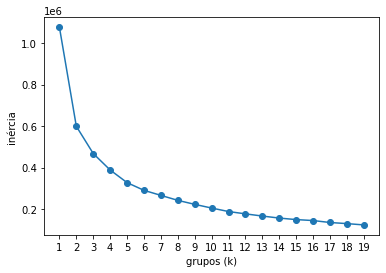

In [420]:
ks = range(1,20)
inercias = []
for k in ks:
    model = KMeans(n_clusters=k)
    model.fit(dados_nao_rotulados)
    inercias.append(model.inertia_)

plt.xlabel('grupos (k)')
plt.ylabel('inércia')
plt.xticks(ks)
_ = plt.plot(ks, inercias, '-o')


In [421]:
model = KMeans(n_clusters=5, max_iter=100, random_state=42)
model.fit(dados_nao_rotulados)
centroids = model.cluster_centers_
grupos = model.predict(dados_nao_rotulados)

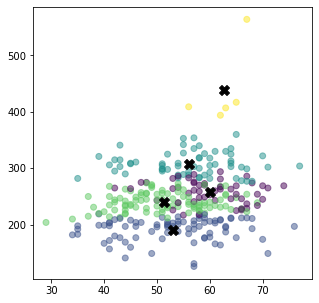

In [422]:
plt.figure(figsize=(5,5))

centroids_x = centroids[:, 0]
centroids_y = centroids[:, 4]
xs = dados_nao_rotulados.iloc[:,0]
ys = dados_nao_rotulados.iloc[:,4]
_=plt.scatter(xs, ys, c=grupos, alpha=.5)
_=plt.scatter(centroids_x, centroids_y, c='black', marker='X', s=100)

# Avaliação

In [423]:
df_avaliacao = pd.DataFrame({'grupos': grupos, 'num': df['num']})
ct = pd.crosstab(df_avaliacao['grupos'], df_avaliacao['num'])
print(ct)

num      0   1   2   3  4
grupos                   
0       15  14  10  10  3
1       48  12   8  10  4
2       29  13  10   7  3
3       65  15   6   8  2
4        3   0   1   0  1


# Visualização hierárquica

In [424]:
from scipy.cluster.hierarchy import linkage, dendrogram

In [425]:
labels = list(dados_nao_rotulados.columns)
labels

['age',
 'sex',
 'cp',
 'trestbps',
 'chol',
 'fbs',
 'restecg',
 'thalach',
 'exang',
 'oldpeak',
 'slope',
 'ca',
 'thal']

In [426]:
from sklearn.preprocessing  import normalize
dados_nao_rotulados_t = dados_nao_rotulados.transpose()
dados_norm = normalize(dados_nao_rotulados_t)
dados_nao_rotulados_t

,0,1,2,3,4,5,6,7,8,9,...,287,288,289,290,291,292,293,294,295,296
age,63.0,67.0,67.0,37.0,41.0,56.0,62.0,57.0,63.0,53.0,...,44.0,63.0,63.0,41.0,59.0,57.0,45.0,68.0,57.0,57.0
sex,1.0,1.0,1.0,1.0,0.0,1.0,0.0,0.0,1.0,1.0,...,1.0,1.0,0.0,1.0,1.0,0.0,1.0,1.0,1.0,0.0
cp,1.0,4.0,4.0,3.0,2.0,2.0,4.0,4.0,4.0,4.0,...,4.0,4.0,4.0,2.0,4.0,4.0,1.0,4.0,4.0,2.0
trestbps,145.0,160.0,120.0,130.0,130.0,120.0,140.0,120.0,130.0,140.0,...,120.0,140.0,124.0,120.0,164.0,140.0,110.0,144.0,130.0,130.0
chol,233.0,286.0,229.0,250.0,204.0,236.0,268.0,354.0,254.0,203.0,...,169.0,187.0,197.0,157.0,176.0,241.0,264.0,193.0,131.0,236.0
fbs,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0
restecg,2.0,2.0,2.0,0.0,2.0,0.0,2.0,0.0,2.0,2.0,...,0.0,2.0,0.0,0.0,2.0,0.0,0.0,0.0,0.0,2.0
thalach,150.0,108.0,129.0,187.0,172.0,178.0,160.0,163.0,147.0,155.0,...,144.0,144.0,136.0,182.0,90.0,123.0,132.0,141.0,115.0,174.0
exang,0.0,1.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,...,1.0,1.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0
oldpeak,2.3,1.5,2.6,3.5,1.4,0.8,3.6,0.6,1.4,3.1,...,2.8,4.0,0.0,0.0,1.0,0.2,1.2,3.4,1.2,0.0


In [427]:
mesclagens = linkage(dados_norm, method='complete')

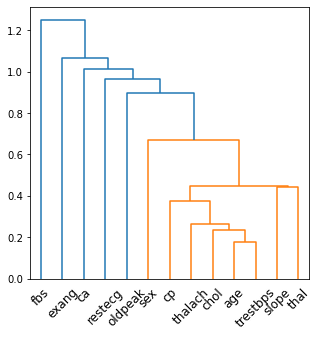

In [428]:
plt.figure(figsize=(5,5))
_ = dendrogram(mesclagens, labels=labels, leaf_rotation=45)

# DBScan

In [429]:
from sklearn.cluster import DBSCAN

In [430]:
db = DBSCAN(eps=3, min_samples=2).fit(scaled_features)
labels = db.labels_
n_clusters_ = len(set(labels)) - (1 if -1 in labels else 0)
n_noise_ = list(labels).count(-1)
print('Estimated number of clusters: %d' % n_clusters_)
print('Estimated number of noise points: %d' % n_noise_)

Estimated number of clusters: 8
Estimated number of noise points: 26


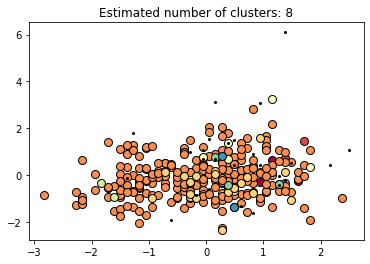

In [431]:
core_samples_mask = np.zeros_like(db.labels_, dtype=bool)
core_samples_mask[db.core_sample_indices_] = True

# Black removed and is used for noise instead.
unique_labels = set(labels)
colors = [plt.cm.Spectral(each) for each in np.linspace(0, 1, len(unique_labels))]

for k, col in zip(unique_labels, colors):
    if k == -1:
        # Black used for noise.
        col = [0, 0, 0, 1]

    class_member_mask = (labels == k)

    xy = scaled_features[class_member_mask & core_samples_mask]
    plt.plot(xy[:, 0], xy[:, 4], 'o', markerfacecolor=tuple(col), markeredgecolor='k', markersize=8)

    xy = scaled_features[class_member_mask & ~core_samples_mask]
    plt.plot(xy[:, 0], xy[:, 4], 'o', markerfacecolor=tuple(col), markeredgecolor='k', markersize=2)

plt.title('Estimated number of clusters: %d' % n_clusters_)
plt.show()


O kmeans obteve um resultado e visualização melhor do que o dbscan. Os dados possuem uma dispersão horizontal que dificulta o agrupamento em clusters esféricos